In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('movie_metadata.csv')


In [4]:
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape

(5043, 28)

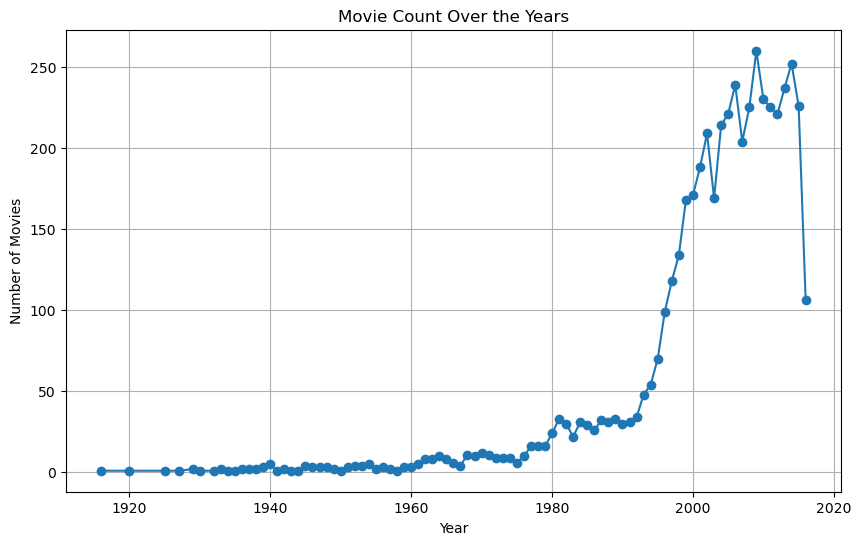

In [6]:
import matplotlib.pyplot as plt
year_counts = df['title_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movie Count Over the Years')
plt.grid(True)
plt.show()

In [7]:
last_release_year = df['title_year'].max()
print("Last release year in the dataset:", last_release_year)

Last release year in the dataset: 2016.0


In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
# recommendation will be based on these features only
df = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [11]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
df['actor_1_name'] = df['actor_1_name'].replace(np.nan, 'unknown')
df['actor_2_name'] = df['actor_2_name'].replace(np.nan, 'unknown')
df['actor_3_name'] = df['actor_3_name'].replace(np.nan, 'unknown')
df['director_name'] = df['director_name'].replace(np.nan, 'unknown')

In [13]:
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [21]:
unique_genres = df['genres'].nunique()
print("Number of unique genres:", unique_genres)

Number of unique genres: 914


In [14]:
df['genres'] = df['genres'].str.replace('|', ' ')

C:\Users\Yassine\AppData\Local\Temp\ipykernel_6828\720138398.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|', ' ')


In [15]:
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [22]:
# Count the number of movies per director
movies_per_director = df['director_name'].value_counts()
print("Movies per director:")
print(movies_per_director)

Movies per director:
unknown             104
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
                   ... 
Mel Smith             1
Dan Harris            1
Ralph Fiennes         1
Bigas Luna            1
Daniel Hsia           1
Name: director_name, Length: 2399, dtype: int64


In [23]:
# Count the number of movies per actor
movies_per_actor = pd.concat([df['actor_1_name'], df['actor_2_name'], df['actor_3_name']]).value_counts()
print("Movies per actor:")
print(movies_per_actor)

Movies per actor:
Robert De Niro        54
Morgan Freeman        47
unknown               43
Johnny Depp           41
Bruce Willis          40
                      ..
Parminder Nagra        1
Wayne Brady            1
Mithun Chakraborty     1
Alexis Biesiada        1
Jon Gunn               1
Length: 6256, dtype: int64


In [16]:
df['movie_title'] = df['movie_title'].str.lower()

In [17]:
# null terminating char at the end
df['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [18]:
# removing the null terminating char at the end
df['movie_title'] = df['movie_title'].apply(lambda x : x[:-1])

In [19]:
df['movie_title'][1]

"pirates of the caribbean: at world's end"

In [20]:
df.to_csv('data.csv',index=False)